[02:07:38.108][4155104544.py::<module>] ℹ Info: Loaded graph 'west_point_downsampled_N_ds5k.gml'. Node count = 5000.
[02:07:38.110][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:07:38.111][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:07:38.111][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:07:38.113][config_utils.py::generate_single_config] ✓ Success: Generated configuration: 

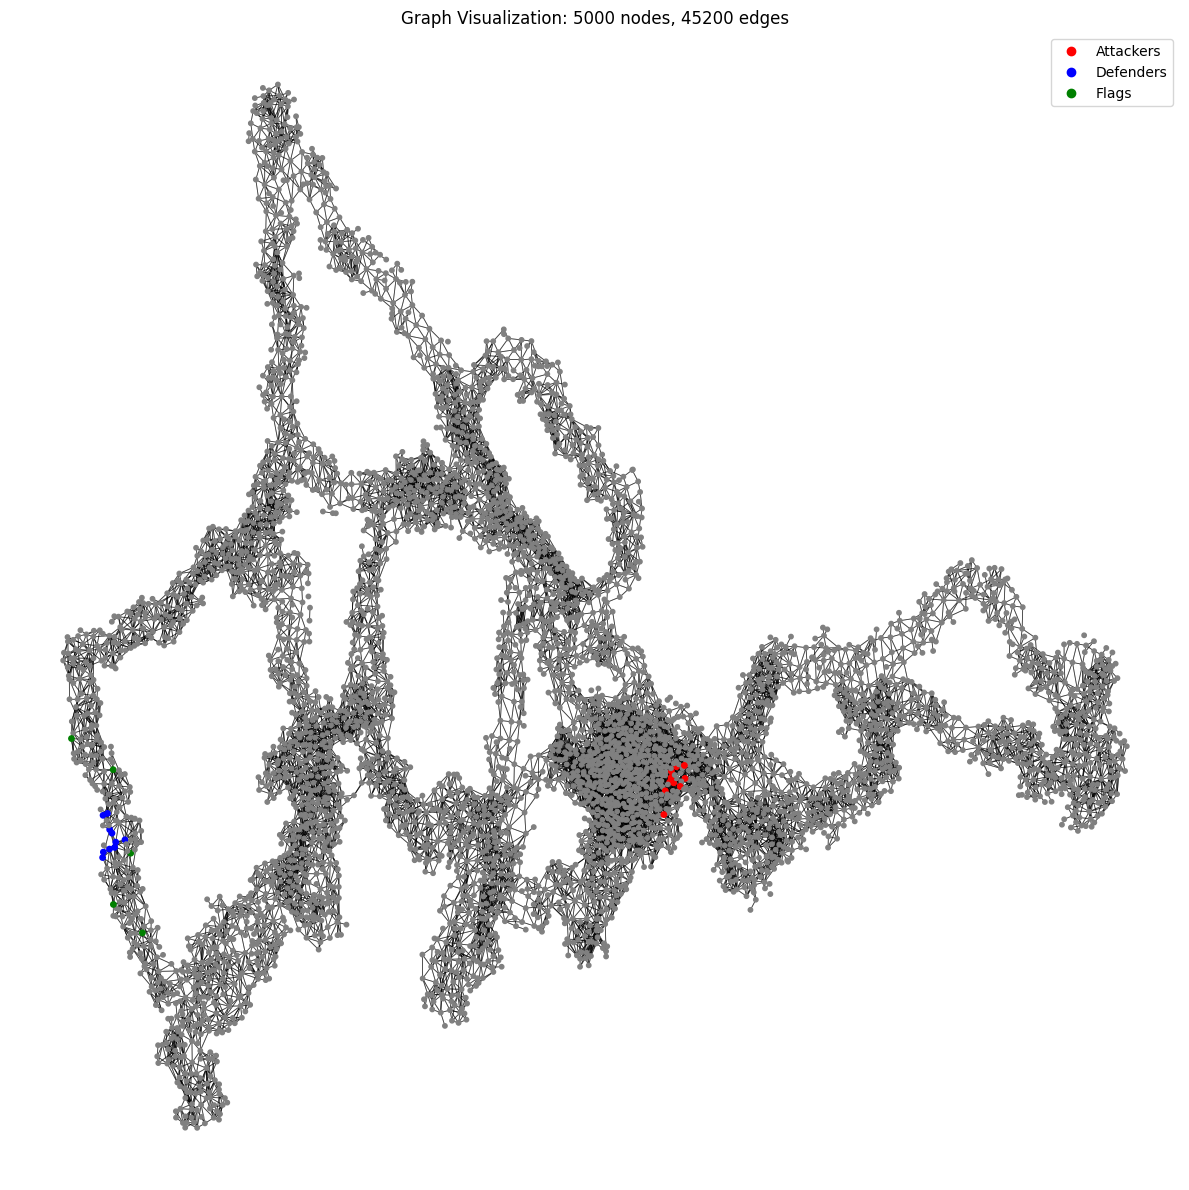

[02:08:05.589][4155104544.py::<module>] ✓ Success: Saved quick-mode visualization to: F5A10D10_custom_a0d2b758f8_ds5k.png


In [4]:
from datetime import datetime
import os
import importlib

# (Re)import your utility modules
import lib.utils.file_utils as FAUTL
import lib.utils.config_utils as CONUTL
import lib.visual.graph_visualizer as GRVIS
from lib.core.core import error, success, info  # existing logging

# Reload the modules so changes take effect in your notebook environment
importlib.reload(FAUTL)
importlib.reload(CONUTL)
importlib.reload(GRVIS)

# --------------------- USER-SPECIFIED SECTION ---------------------

## ------- OVERRIDES FOR POSITIONS ---------------------

# 3k Graph
# ATTACKER_POSITIONS = [5764607523034235542, 8070450532247933215, 5764607523034235532, 8070450532247933205, 8070450532247933211, 8070450532247933227, 8070450532247933293, 8070450532247933197, 8070450532247933250, 8070450532247933203]  # Use default random distribution
# DEFENDER_POSITIONS = [8070450532247937197, 8070450532247937157, 8070450532247937181, 8070450532247937209, 8070450532247937212, 8070450532247937219, 5764607523034235097, 8070450532247937184, 5764607523034235121, 8070450532247937217]  # Use default random distribution
# FLAG_POSITIONS = [8070450532247937264, 8070450532247937057, 8070450532247937169, 8070450532247937470, 5764607523034235168]  # Use default random distribution

# 5k Graph
ATTACKER_POSITIONS = [8070450532247935109, 8070450532247936078, 8070450532247938086, 8070450532247942217, 8070450532247936027, 8070450532247942611, 5764607523034236921, 8070450532247941902, 8070450532247941872, 8070450532247942609]
DEFENDER_POSITIONS = [8070450532247939628, 8070450532247939690, 5764607523034235810, 8070450532247939629, 8070450532247939688, 5764607523034235816, 5764607523034235812, 8070450532247939683, 8070450532247939633, 8070450532247939632]
FLAG_POSITIONS = [8070450532247939728, 8070450532247939539, 8070450532247939572, 5764607523034235808, 8070450532247939832]
# ------------------------------------------------------------

# 1) Which graph file (relative to data/graphs) are we using?
GRAPH_DIR = os.path.join("data", "graphs")
SELECTED_GRAPH_NAME = "west_point_downsampled_N_ds5k.gml"

# 2) Game rule
GAME_RULE = "V1"   # must match data/rules/V1.yml

# 3) Flag parameters (exactly one choice)j
FLAG_NUMBER = 1
FLAG_DISTRIBUTION_CENTER = 5764607523034234906
FLAG_DIST_TYPE = "uniform"
FLAG_PARAM = 2

# 4) Attacker parameters (exactly one choice)
ATTACKER_NUMBER = 1
ATTACKER_DISTRIBUTION_CENTER = 5764607523034234906
ATTACKER_DIST_TYPE = "normal"
ATTACKER_PARAM = [7, 3]   # must be a list, not tuple

# 5) Defender parameters (exactly one choice)
DEFENDER_NUMBER = 1
DEFENDER_DISTRIBUTION_CENTER = 5764607523034234906
DEFENDER_DIST_TYPE = "normal"
DEFENDER_PARAM = [4, 2]   # list, not tuple

# 6) Path to the "default_config.yml" template
DEFAULT_CONFIG_PATH = os.path.join("data", "default_config.yml")

# 7) Where to write the single resulting YAML
OUTPUT_CONFIG_DIR = os.path.join("data", "config", "custom_configs")
os.makedirs(OUTPUT_CONFIG_DIR, exist_ok=True)

# 8) Where to write the PNG
OUTPUT_IMAGE_DIR = os.path.join("data", "image", "custom_configs")
os.makedirs(OUTPUT_IMAGE_DIR, exist_ok=True)

# -------------------------------------------------------------------

# 1. Load the chosen graph from disk:
graph_path = os.path.join(GRAPH_DIR, SELECTED_GRAPH_NAME)
try:
    selected_graph = FAUTL.export_graph_generic(graph_path)
    info(f"Loaded graph '{SELECTED_GRAPH_NAME}'. Node count = {selected_graph.number_of_nodes()}.")
except Exception as e:
    error(f"Failed to load graph {SELECTED_GRAPH_NAME}: {e}")
    raise Exception(f"Graph loading failed. Check the logs for details.")

# 2. Generate exactly one config:
success_flag, config_filename = CONUTL.generate_single_config(
    graph=selected_graph,
    graph_file=SELECTED_GRAPH_NAME,
    flag_num=FLAG_NUMBER,
    flag_dist_type=FLAG_DIST_TYPE,
    flag_param=FLAG_PARAM,
    attacker_num=ATTACKER_NUMBER,
    defender_num=DEFENDER_NUMBER,
    attacker_dist_type=ATTACKER_DIST_TYPE,
    attacker_param=ATTACKER_PARAM,
    defender_dist_type=DEFENDER_DIST_TYPE,
    defender_param=DEFENDER_PARAM,
    game_rule=GAME_RULE,
    output_dir=OUTPUT_CONFIG_DIR,
    default_config_path=DEFAULT_CONFIG_PATH,
    debug=True,
    center_node_flag=FLAG_DISTRIBUTION_CENTER,
    center_node_attacker=ATTACKER_DISTRIBUTION_CENTER,
    center_node_defender=DEFENDER_DISTRIBUTION_CENTER,
    custom_attacker_positions= ATTACKER_POSITIONS,  # Use default random distribution
    custom_defender_positions=DEFENDER_POSITIONS,  # Use default random distribution
    custom_flag_positions=FLAG_POSITIONS,  # Use default random distribution
)

if not success_flag:
    error("Configuration generation failed.")
    raise Exception("Configuration generation failed. Check the logs for details.")

# 2a. Rename the YAML to include F<flag>A<attacker>D<defender> prefix
original_path = os.path.join(OUTPUT_CONFIG_DIR, config_filename)
base_name, ext = os.path.splitext(config_filename)  # e.g. ("config_<hash>", ".yml")
if ATTACKER_POSITIONS or DEFENDER_POSITIONS or FLAG_POSITIONS:
    prefix = f"F{len(FLAG_POSITIONS)}A{len(ATTACKER_POSITIONS)}D{len(DEFENDER_POSITIONS)}"
    base_name = base_name.replace("config_", "custom_")  # Ensure custom prefix
    # Add the last part of the graph name to the base name
    graph_name_part = SELECTED_GRAPH_NAME.split('.')[0]  # Remove file extension
    graph_key = graph_name_part.split('_')[-1]  # Get the last part of the graph name
    base_name += f"_{graph_key}"
else:
    prefix = f"F{FLAG_NUMBER}A{ATTACKER_NUMBER}D{DEFENDER_NUMBER}"

new_file_name = f"{prefix}_{base_name}{ext}"
new_config_path = os.path.join(OUTPUT_CONFIG_DIR, new_file_name)

try:
    os.rename(original_path, new_config_path)
    success(f"Renamed config to: {new_file_name}")
except Exception as e:
    error(f"Failed to rename config file: {e}")
    raise Exception(f"Renaming config file failed. Check the logs for details.")

# 3. Visualize the new config in “quick” mode and save a PNG:
#    -- USE OUTPUT_IMAGE_DIR so PNG goes into data/image/single_config_run
image_base, _ = os.path.splitext(new_file_name)
image_name = image_base + ".png"
image_path = os.path.join(OUTPUT_IMAGE_DIR, image_name)

try:
    vis = GRVIS.GraphVisualizer(file_path=new_config_path, mode="static", debug=True, node_size=10, static_edge_width=0.6)
    vis.visualize(save_path=image_path, show_ids=False)
    success(f"Saved quick-mode visualization to: {image_name}")
except Exception as e:
    error(f"Failed to visualize graph: {e}")
    raise Exception(f"Graph visualization failed. Check the logs for details.")